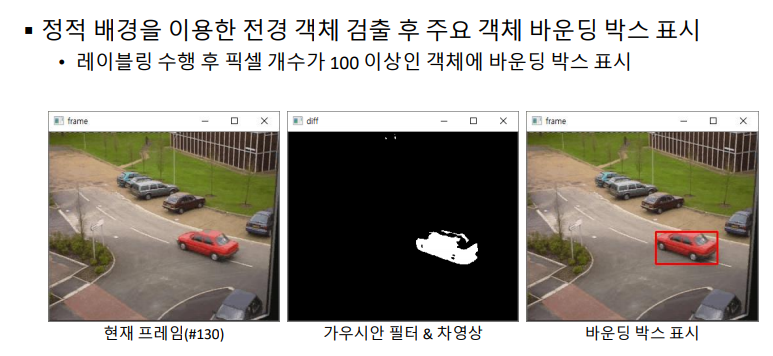

In [1]:
import sys 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
import random 
!pip install opencv-python

In [20]:
cap = cv2.VideoCapture(0)

In [21]:
if not cap.isOpened():

    print('Video open failed!')

    sys.exit()


In [22]:
ret, back = cap.read()

In [23]:
if not ret:

    print('Background image registration failed!')

    sys.exit()

첫 프레임 배경을 그레이스케일로 바꾸고 가우시안 블러를 통해 노이즈를 제거해 줍니다.

In [24]:
back = cv2.cvtColor(back, cv2.COLOR_BGR2GRAY)

back = cv2.GaussianBlur(back, (0, 0), 1.0)

In [ ]:
while True:

    ret, frame = cap.read()


    if not ret:

        break
    

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    gray = cv2.GaussianBlur(gray, (0, 0), 1.0)


    # 차영상 구하기 & 이진화

    diff = cv2.absdiff(gray, back)

    _, diff = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)


    #diff 프레임의 차분은 흰색으로 표현되니 이것을 바운딩 처리할 것입니다. 

    cnt, _, stats, _ = cv2.connectedComponentsWithStats(diff)

    #스테치행렬을 받아서 스테칭행렬이 바운딩 박스 정보를 제공합니다.
    #카운트는 여기서 안쓰죠.


    for i in range(1, cnt):

        x, y, w, h, s = stats[i]

        #스테칭 행렬이 바운딩 박스정보 제공   

        if s < 100:

            continue

        #픽셀사이즈가 작으면 무시합니다.


        cv2.rectangle(frame, (x, y, w, h), (0, 0, 255), 2)

        #오리지날 영상 프레임에다가 빨간색으로 그린다.

    cv2.imshow('frame', frame)

    cv2.imshow('diff', diff)


    if cv2.waitKey(30) == 27:

        break


cap.release()

cv2.destroyAllWindows()